# Surveying Neural Spiking in Visual Cortex

## 1 Preparation

Import the modules required for this notebook

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pingouin as pg

Download the data required for this notebook

In [2]:
import requests

url = "https://uni-bonn.sciebo.de/s/mLMkb2TwbNx3Yg6"
fname = "flash_spikes.parquet"
response = requests.get(f"{url}/download")
print("Downloading Data ...")
with open(fname, "wb") as file:
    file.write(response.content)
print("Done!")

## 2 Exploring the Data

In this notebook, we are working with data that was recorded in a
[recent study](https://www.nature.com/articles/s41586-020-03171-x)
conducted at the Allen Institute for Brain Science. The data we’ll use
contains the spikes recorded from over 300 neurons recorded across 6
different visual brain areas. In this section, we are going to read the
data into a pandas data frame and explore its contents.

| Code | Description |
|------------------------------------|------------------------------------|
| `df = pd.read_parquet("mydata.parquet")` | Read the file `"mydata.parquet"` into a data frame `df` |
| `df.head(n)` | Print the first `n` lines of the data frame `df` |
| `df.shape` | Get the `shape` of a data frame (i.e. the number of rows and columns) |
| `df.col1` | Access the column `col1` of the data frame `df` |
| `df.col1.unique()` | Get the `.unique()` values stored in the column `col1` |
| `df.col1.nunique()` | Get the number of unique values in the column `col` |
| `df.col1.max()` | Get the maximum value in column `col1` |
| `df.groupby("col1")` | Group the data in `df` by the values in `"col1"` |
| `df.groupby("col1").col2.count()` | Get the `.count()` of `.col2` for every unique value in `"col1"` |

------------------------------------------------------------------------

<span class="theorem-title">**Exercise 1**</span> Load the data stored
in `flash_spikes.parquet` into a data frame and print the first 5 rows.

​

<span class="theorem-title">**Exercise 2**</span> How many spikes are
there in the data frame (HINT: each row contains one spike)

​

<span class="theorem-title">**Exercise 3**</span> At what time was the
first and last spike recorded?

​

<span class="theorem-title">**Exercise 4**</span> From which (unique)
brain areas were the spikes recorded?

​

<span class="theorem-title">**Exercise 5**</span> What is the total
number of units recorded?

​

<span class="theorem-title">**Exercise 6**</span> What is the number of
spikes recorded from every unit?

​

<span class="theorem-title">**Exercise 7**</span> What is the number of
units recorded in each brain area (HINT: use
`df.groupby("brain_area")["unit_id"]`)?

​

<span class="theorem-title">**Exercise 8**</span> What is the smallest
and largest number of spikes recorded from any single unit?

​

## 3 Visualizing Neural Firing with Rasterplots

Even though the metrics we computed in the previous section are useful
for describing and understanding the data, they only provide a very
coarse and incomplete picture. In this section, we are going to
visualize the spike trains to get a more detailed view of what is going
on. For this, we will use rasterplots, one of the most common
visualizations of neural spiking activity. We can make rasterplots for
single neurons or groups of neurons to show how the firing of neurons
evolves over time.

| Code | Description |
|------------------------------------|------------------------------------|
| `df[df.col1==1]` | Get all rows of `df` where the value of column `.col1` equals `1` |
| `df.col1.tolist()` | Export the data in column `.col1` as a list |
| `plt.eventplot(x)` | Plot the events in `x` |
| `plt.eventplot(x, linewidth=0.5, linelengths=0.5)` | Plot the events in `x` and change the with and legth of the lines |
| `plt.eventplot([x1, x2], lineoffsets=1.5)` | Plot the events in `x1` and `x2` on separate lines with the given offset |
| `plt.xlim(xmin, xmax)` | Limit the x-axis to the range between `xmin` and `xmax` |

------------------------------------------------------------------------

<span class="theorem-title">**Exercise 9**</span> Get all spikes
recorded from unit `951021564`

​

<span class="theorem-title">**Exercise 10**</span> Create a rasterplot
of the spikes recorded from unit `951021564` (HINT: use
`plt.eventplot`).

​

<span class="theorem-title">**Exercise 11**</span> Create a rasterplot
of the spikes recorded from unit `951021564` and reduce the `linewidth`
to `0.5`.

​

<span class="theorem-title">**Exercise 12**</span> Create a rasterplot
for the units `951021564` and `951021835` (HINT: `plt.eventplot` accepts
a lists as input).

​

<span class="theorem-title">**Example 1**</span> Extract the spikes
recorded from every unit in the primary visual cortex `"V1"`.

In [27]:
mask = df.brain_area == "V1"
spike_times = df[mask].groupby("unit_id").spike_time.unique().tolist()

<span class="theorem-title">**Exercise 13**</span> Create a rasterplot
displaying the `spike_times` from each unit between `1300` and `1350`
seconds.

​

<span class="theorem-title">**Exercise 14**</span> Create a rasterplot
displaying the spikes from all units recorded in the posteriomedial area
`"PM"` between `1300` and `1350` seconds.

​

<span class="theorem-title">**Exercise 15**</span> Create a rasterplot
displaying the spikes from all units recorded in the rostrolateral area
`"RL"` between `1400` and `1500` seconds.

​

## 4 Comparing Neural Firing Across Visual Areas

Raster plots are great for detailed visualization of neural firing but
with all this detail, it is difficult to make out larger trends and
compare the activity between larger groups of neurons. In this section,
we are going to use the seaborn library to create plots that aggregate
information across spikes and units which allows us to compare the
different areas in the visual cortex.

| Code | Description |
|------------------------------------|------------------------------------|
| `sns.countplot(df, x="col1")` | Create a barplot that counts how often each unique value in `"col1"` appears in `df` |
| `sns.countplot(df, y="col1")` | Create the same bar plot but with horizontal bars |
| `sns.countplot(df, x="col1", hue="col2")` | Create count plot for the unique values in `"col1"` and add a `hue` for the unique values in `"col2"` |
| `sns.kdeplot(df, x="col1")` | Plot the kernel density estimate for the values in `"col1"` |
| `sns.kdeplot(df, x="col1", hue="col2")` | Plot the kernel density estimate for the values in `"col1"` and add a `hue` for the unique values in `"col2"` |
| `sns.barplot(x)` | Create a barplot for the aggregated values in the pandas series `x` |

------------------------------------------------------------------------

<span class="theorem-title">**Exercise 16**</span> Create a
`sns.countplot` that displays the number of spikes recorded from each
`"brain_area"`.

​

<span class="theorem-title">**Exercise 17**</span> Create a
`sns.countplot` that displays the number of spikes recorded from each
`"unit"` (HINT: you can remove the x-ticks with `plt.xticks([])`).

​

<span class="theorem-title">**Exercise 18**</span> Create a
`sns.countplot` that displays the number of spikes recorded from each
`"unit"` and add a `hue` to encode `"brain_area"`.

​

<span class="theorem-title">**Exercise 19**</span> Create the same plot
again but with horizontal bars

​

<span class="theorem-title">**Exercise 20**</span> Create a
`sns.kdeplot` to visualize the distribution of `"spike_time"`

​

<span class="theorem-title">**Exercise 21**</span> Create a
`sns.kdeplot` to visualize the distribution of `"spike_time"` and add a
`hue` for `"brain_area"`.

​

<span class="theorem-title">**Exercise 22**</span> Compute the number of
units recorded in each brain area and plot the result as a `sns.barplot`
(HINT: the function only requires a single argument).

​

<span class="theorem-title">**Exercise 23**</span> Get the number of
spikes recorded from each brain area and divide it by the number of
units recorded in each area to get the average number of spikes per unit
in each area. Then, plot the result as a `sns.barplot`.

​

## 5 Statistical Comparison of Firing Rates across Areas

The visualizations from the previous session seem to suggest differences
in firing rates between visual areas. In this section we are going to
quantify these differences. We are going to compute the firing rates for
every unit and visualize their distribution across the different brain
areas. Then, we are going to use the Mann-Whitney-U (MWU) test to check
whether the observed differences are statistically significant. The MWU
test is a non-parametric statistical test that estimates how likely it
is that two sets of measurements (i.e. firing rates in two areas) come
from the same distribution. Based on this probability, captured by the
`p-value`, we can assess whether the difference is above what we would
expect by chance.

| Code | Description |
|------------------------------------|------------------------------------|
| `df.groupby(["col1", "col2"])` | Group `df` by the columns `"col1"` and `"col2"` |
| `df.reset_index()` | Reset the index of `df` and store the old index as a new column |
| `df.columns = ["new1", "new2"]` | Rename the columns to `"new1"` and `"new2"` (the number of elements must match the number of columns) |
| `sns.barplot(df, x="col2", y="col1", estimator="mean")` | Plot the `"mean"` of the `"col1"` for every category in `"col2"` |
| `pg.mwu(x, y)` | Apply the MWU test to the measurements `x` and `y` |
| `pg.multicomp(pvals, alpha, method="bonferroni")` | Apply the Bonferroni correction for multiple comparisons to the given `pvals` and check if they are significant given the threshold `alpha` |

------------------------------------------------------------------------

<span class="theorem-title">**Exercise 24**</span> Compute the number of
spike times for each `"brain_area"` and `"unit_id"`.

​

<span class="theorem-title">**Exercise 25**</span> Divide the result
from <a href="#exr-count" class="quarto-xref">Exercise 24</a> by the
duration of the recording to get the firing rate of every unit (HINT:
you can approximate the duration as the difference between the first and
last `"spike_time"`). Assign the result to a new variable `fr`.

​

<span class="theorem-title">**Exercise 26**</span> Use
`fr.reset_index()` to create a new data frame where each row represents
one unit (HINT: the method does not modify `fr` so you must expliclity
overwrite the original value). Then, rename the columns to label the new
column with `"firing_rate"` and print the renamed data frame.

​

<span class="theorem-title">**Example 2**</span> Create a `sns.barplot`
for the mean `"firing_rate"` of every `"brain_area"`.

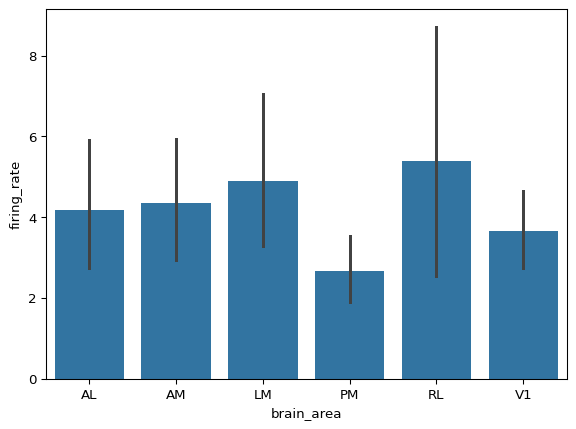

In [56]:
sns.barplot(fr, x="brain_area", y="firing_rate", estimator="mean")

<span class="theorem-title">**Exercise 27**</span> Create a
`sns.barplot` for the standard deviation `"std"` of the `"firing_rate"`
of every `"brain_area"`.

​

<span class="theorem-title">**Exercise 28**</span> Create a
`sns.kdeplot` to visualize the distribution of `"firing_rate"` and add a
`hue` to encode the `"brain_area"`.

​

<span class="theorem-title">**Exercise 29**</span> Re-create the
`sns.kdeplot` but use `common_norm=False` to account for the difference
in the number of recorded units per area.

​

<span class="theorem-title">**Example 3**</span> Perform a
Mann-Whitney-U-Test to test if there is a significant difference in
firing rate between the primary visual cortex `"V1"` and the
anterolateral area `"AL"`

In [63]:
x = fr[fr.brain_area == "V1"].firing_rate
y = fr[fr.brain_area == "AL"].firing_rate
pg.mwu(x, y)

<span class="theorem-title">**Exercise 30**</span> Look at the graph
created in <a href="#exm-mean" class="quarto-xref">Example 2</a> that
showed the mean firing rates for each brain area. Based on this plot,
which differences would you expect to be significant? Test you
expectation by performing Mann-Whitney-U-Test on the respective pair(s).

​

<span class="theorem-title">**Example 4**</span> Apply the Bonferroni
correction to adjust the p-values for multiple comparisons and compare
them to the given threshold `alpha`.

In [66]:
pvals = [0.01, 0.04]
alpha = 0.05
pg.multicomp(pvals, alpha, method="bonferroni")

(array([ True, False]), array([0.02, 0.08]))

<span class="theorem-title">**Exercise 31**</span> Apply the Bonferroni
correction to adjust the p-values returned by the statistical tests you
performed in the exercises before. Are the results still significant
after correction?

​